Training Random Forest
train cross val 0.9724729815638906
test cross val 0.7098635235732009
train acc 0.9724745389485274
test acc 0.7098844672657253


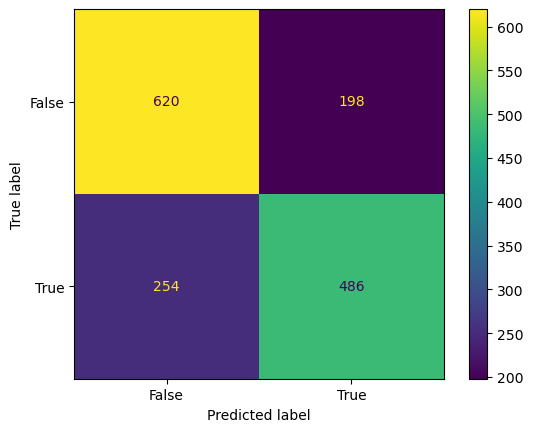

<Figure size 640x480 with 0 Axes>

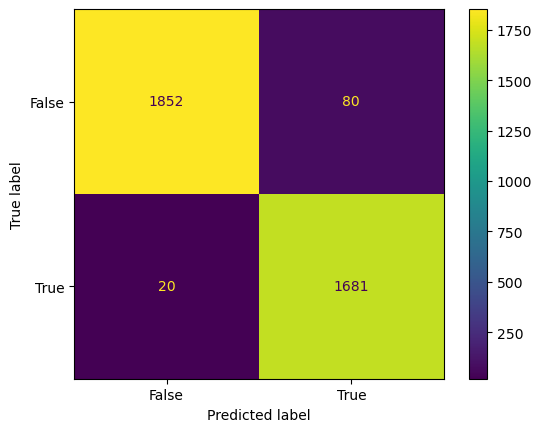

In [2]:
import pandas as pd
import sklearn
import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")



df = pd.read_csv('processed_data.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)

X_new = SelectKBest(f_classif, k=80).fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)



"""
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    'SVM' : SVC(kernel = "poly", degree = 3, coef0=1, C=5)
}
"""

models = {'Random Forest': RandomForestClassifier(n_estimators=150, max_depth = 120)}

for name, model in models.items():
    print('Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=10)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=10)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())



    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    plt.figure()

    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
    cm_display.plot()
    plt.show()


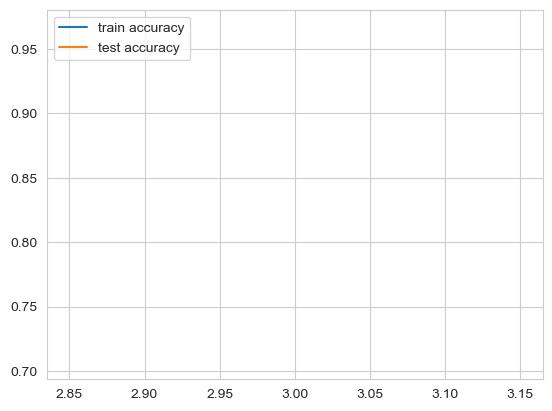

train cross val 0.9675173311536949
test cross val 0.7066666666666668
train acc 0.9675199559592623
test acc 0.7066752246469833


In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

train_accs_cross = []
test_accs_cross = []

train_accs_asaf = []
test_accs_asaf = []


rng = [3]
for cvv in rng:

    clf = RandomForestClassifier(n_estimators=130, max_depth = 100, min_samples_split = 6,min_samples_leaf = 3, bootstrap = False,max_features = 'auto')
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train_cross = cross_val_score(clf, y_train, y_pred_train, cv=cvv).mean()
    scores_test_cross = cross_val_score(clf, y_test, y_pred_test, cv=cvv).mean()
    
    scores_train_asaf = accuracy_score(y_train, y_pred_train).mean()
    scores_test_asaf = accuracy_score(y_test, y_pred_test).mean()

    train_accs_cross.append(scores_train_cross)
    test_accs_cross.append(scores_test_cross)

    train_accs_asaf.append(scores_train_asaf)
    test_accs_asaf.append(scores_test_asaf)

plt.figure()
sns.set_style("whitegrid")
plt.plot(rng,train_accs_cross, label="train accuracy")
plt.plot(rng,test_accs_cross, label="test accuracy")
plt.legend(loc="upper left")
#plt.xticks(range(90,160,5))
plt.show()

scores_train = cross_val_score(clf, y_train, y_pred_train, cv=10)
print('train cross val',scores_train.mean())
scores_test = cross_val_score(clf, y_test, y_pred_test, cv=10)
print('test cross val',scores_test.mean())

scores_train = accuracy_score(y_train, y_pred_train)
print('train acc',scores_train.mean())
scores_test = accuracy_score(y_test, y_pred_test)
print('test acc',scores_test.mean())


In [5]:
print(list(test_accs_cross))

max_value = max(test_accs_cross)
max_index = test_accs_cross.index(max_value)

print("Maximum value:", max_value)
print("Index of maximum value:", max_index)
print(list(rng)[max_index])

[0.7034491315136476, 0.7028163771712159, 0.7015384615384614, 0.7021753515301902, 0.7156368899917287, 0.7162737799834574, 0.7201199338296111]
Maximum value: 0.7201199338296111
Index of maximum value: 6
14


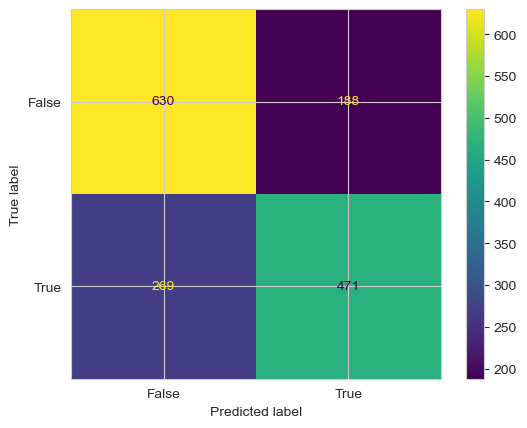

<Figure size 640x480 with 0 Axes>

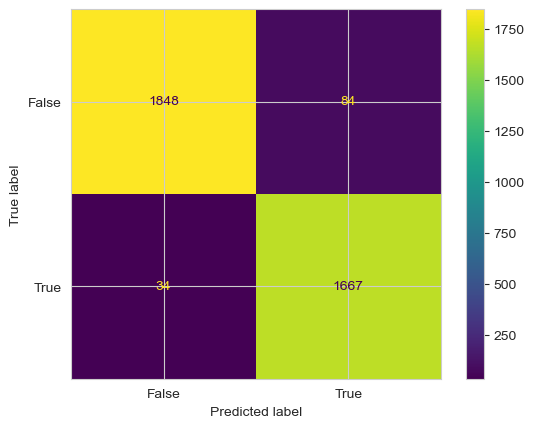

In [12]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()